# EDA

In [19]:
import pandas as pd
import os
import seaborn as sns

In [44]:
transactions = pd.read_csv(os.path.join("data", "transactions_dataset_clean.csv")).drop(columns="Unnamed: 0")

In [45]:
transactions

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,unit_price,stock_flow,month_order,order_invoice_delta
0,2017-09-25,2017-09-25,2376333,188502,155.443200,-3,online,2732,51.814400,-1,9,0.0
1,2017-09-25,2017-09-25,2520527,835089,16.394400,-3,at the store,10279,5.464800,-1,9,0.0
2,2017-09-25,2017-09-25,2536756,1977896,365.766240,-21,online,6184,17.417440,-1,9,0.0
3,2017-09-25,2017-09-25,3028673,598816,8.598780,-201,at the store,4200,0.042780,-1,9,0.0
4,2017-09-25,2017-09-25,203377,2086861,1093.374000,-3,by phone,7051,364.458000,-1,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17345688,2018-04-11,2018-04-11,1947405,448780,30.046178,-19,at the store,9729,1.581378,-1,4,0.0
17345689,2018-04-11,2018-04-11,1563709,399288,20.451600,-3,at the store,8921,6.817200,-1,4,0.0
17345690,2018-03-30,2018-04-11,2198494,265895,-26.795000,5,by phone,8796,-5.359000,1,3,12.0
17345691,2018-04-11,2018-04-11,150554,1552553,51.115200,-3,at the store,9601,17.038400,-1,4,0.0


In [43]:
transactions.date_order.dt.month

0          9
1          9
2          9
3          9
4          9
          ..
5651861    7
5651862    7
5651863    8
5651864    7
5651865    9
Name: date_order, Length: 5651866, dtype: int64

## Highest margins product

In [24]:
products = transactions.loc[:,["product_id", "sales_net", "quantity"]]
products = products.groupby(by="product_id").sum()
products.sort_values(by="sales_net", ascending=True, inplace=True)

In [25]:
products

,sales_net,quantity
product_id,,
1961007,-3.004589e+04,115
2146202,-6.371483e+03,5
1665388,-6.058228e+03,2199
1730738,-3.827039e+03,5
2663164,-3.548831e+03,5
...,...,...
875236,2.368019e+06,466062
560204,2.370963e+06,4563407
417321,2.745720e+06,44096


In [26]:
products[products.sales_net<-1]

,sales_net,quantity
product_id,,
1961007,-30045.887467,115
2146202,-6371.483000,5
1665388,-6058.227600,2199
1730738,-3827.039000,5
2663164,-3548.831000,5
...,...,...
1437689,-4.943029,49
2348166,-3.005180,26
1261260,-2.984664,254


<AxesSubplot:xlabel='quantity', ylabel='sales_net'>

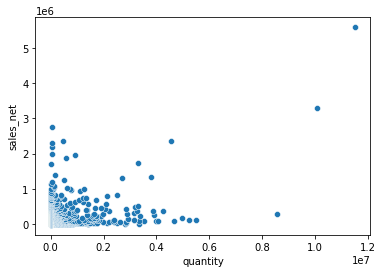

In [29]:
sns.scatterplot(data=products, x="quantity", y="sales_net")

## Biggest customers 

Insight ideas :
   - Highest margins
   - Biggest customers
   - Biggest branches
   - Seasonal effects
   - Trends
   - Highest growing products
   - product correlations
   - product lifespan
   - client lifespan / frequency

In [39]:
transactions

,date_order,date_invoice,product_id,client_id,sales_net,quantity,branch_id,month,order_invoice_delta
0,2017-09-25,2017-09-25,2376333,188502,155.443200,3,2732,9,0
1,2017-09-25,2017-09-25,2536756,1977896,365.766240,21,6184,9,0
2,2017-09-25,2017-09-25,1329933,234582,253.566720,11,7203,9,0
3,2017-09-25,2017-09-25,223339,1982880,83.324400,3,8453,9,0
4,2017-09-26,2017-09-26,2265447,517696,33.285600,201,3974,9,0
...,...,...,...,...,...,...,...,...,...
5651861,2019-07-04,2020-07-29,2087288,1419864,-21.859200,3,9162,7,391
5651862,2019-07-03,2020-06-12,438716,2212698,745.917600,3,4424,7,345
5651863,2019-08-14,2020-01-16,3064003,1150574,3.201600,3,9028,8,155
5651864,2019-07-17,2020-02-20,2601529,1354446,-5.961600,3,8281,7,218
